# Assignment - 1

Name : Abhishek Aditya BS

SRN : PES1UG19CS019

VI Semester 'A' Section

Date : 2-03-2022

# Problem Statement - 2

## To implement Anova SVM

ANOVA analyzes every feature's variance in the dataset, and SVM enhances
the classifier's performance. .Each feature's distance value is distributed into
two groups by calculating the mean value of the data distance value. With this
proposed technique, it can be used to separate relevant features from unused
features.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, feature_selection
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

## Import the dataset

In [4]:
digits = datasets.load_digits()
y = digits.target

## Throw away data, to be in the curse of dimension settings

In [5]:
y = y[:200]
X = digits.data[:200]
n_samples = len(y)
X.reshape((n_samples, -1))

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  2., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 12.,  1.,  0.]])

## Adding 200 Non-Informative features


In [6]:
X = np.hstack((X, 2 * np.random.random((n_samples, 200))))


## Creating a feature-selection transform and an instance of SVM that we combine together to have an full-blown estimator

In [7]:
transform = feature_selection.SelectPercentile(feature_selection.f_classif)

clf = Pipeline([('anova', transform), ('svc', svm.SVC(C=1.0))])

## Plotting the cross-validation score as a function of percentile of features



In [ ]:
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
  clf.set_params(anova__percentile=percentile)
  this_scores = cross_val_score(clf, X, y, n_jobs=1)
  score_means.append(this_scores.mean())
  score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()


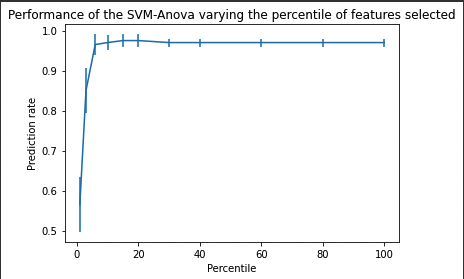